# Uber Trips Analysis.

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn

In [106]:
data = pd.read_csv("uber.csv") 
data.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [168]:
data["Date/Time"] = data["Date/Time"].map(pd.to_datetime) 
data.head()

,Date/Time,Lat,Lon,Base,Day,Weekday,Hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0


In [169]:
def get_day(dt):
    return dt.day

data['Day'] = data['Date/Time'].map(get_day)

def get_weekday(dt):
    return dt.weekday()

data['Weekday'] = data['Date/Time'].map(get_weekday)

def get_hour(dt):
    return dt.hour

data['Hour'] = data['Date/Time'].map(get_hour)

data.head()

,Date/Time,Lat,Lon,Base,Day,Weekday,Hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0


# Analyze: Day of the Month (Day).

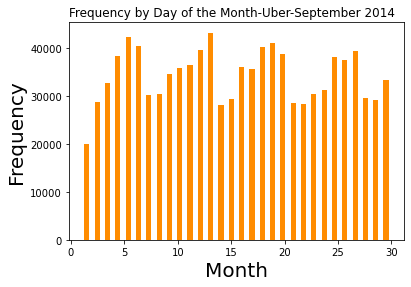

In [109]:
plt.hist(data.Day, bins=30, rwidth=0.5, color='darkorange')
plt.xlabel('Month',size=20)
plt.ylabel('Frequency',size=20)
plt.title('Frequency by Day of the Month-Uber-September 2014',loc='left',size=12);

In [110]:
def count_rows(rows):
    return len(rows)
date = data.groupby('Day').apply(count_rows)
print(len(date))
print(date.sort_values())

30
Day
1     19961
14    28122
22    28312
21    28620
2     28831
29    29201
15    29454
28    29656
7     30134
23    30316
8     30360
24    31301
3     32631
30    33431
9     34560
17    35531
10    35910
16    36092
11    36439
26    37504
25    38203
4     38360
20    38864
27    39468
12    39540
18    40274
6     40520
19    41017
5     42319
13    43205
dtype: int64


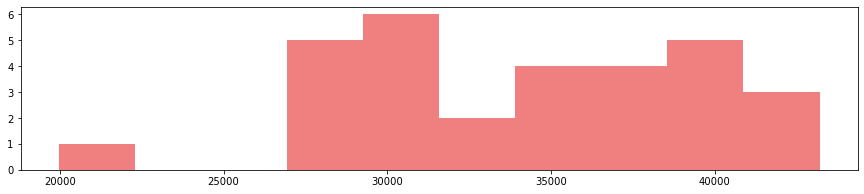

In [111]:
plt.figure(figsize=(15,3))
plt.hist(date,color='lightcoral');

In [112]:
date_sorted = date.sort_values()
date_sorted

Day
1     19961
14    28122
22    28312
21    28620
2     28831
29    29201
15    29454
28    29656
7     30134
23    30316
8     30360
24    31301
3     32631
30    33431
9     34560
17    35531
10    35910
16    36092
11    36439
26    37504
25    38203
4     38360
20    38864
27    39468
12    39540
18    40274
6     40520
19    41017
5     42319
13    43205
dtype: int64

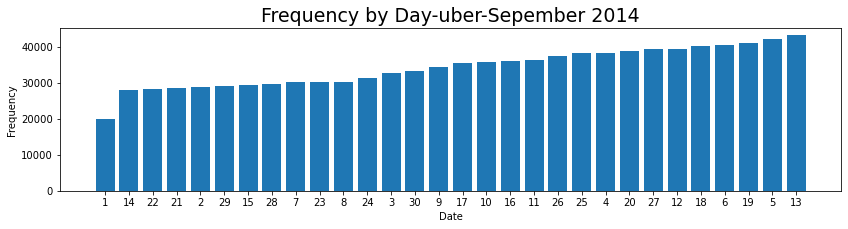

In [113]:
plt.figure(figsize=(14, 3))
plt.bar(range(1, 31), date_sorted)
plt.xticks(range(1, 31), date_sorted.index)
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Frequency by Day-uber-Sepember 2014',size=19);

# Analyze the hours.

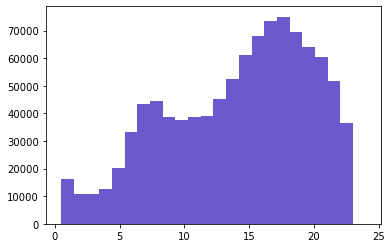

In [114]:
plt.hist(data.Hour,bins=24, range=(.5, 24),color='slateblue');

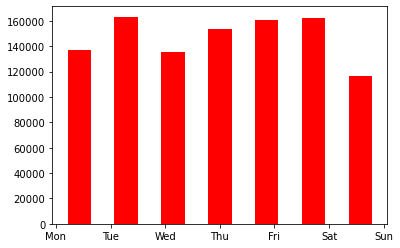

In [115]:
plt.hist(data.Weekday,bins=7, rwidth=0.5,color='red')
plt.xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split());

In [167]:
count_rows(data)
Hour_Weekday = data.groupby('Hour Weekday'.split()).apply(count_rows).unstack()
Hour_Weekday

Weekday,0,1,2,3,4,5,6
Hour,,,,,,,
0,1885,1411,1489,1762,2513,6909,8164
1,1201,784,885,1037,1530,4737,5933
2,977,609,597,714,1002,2957,3846
3,1780,1221,966,1088,1347,2029,2358
4,2479,2093,1612,1720,1819,1458,1494
5,3905,4196,3130,2754,3115,1544,1618
6,5668,7393,5699,5586,5186,2092,1683
7,7223,9466,7067,7790,6698,2790,2280
8,7287,9374,6665,7663,6715,3664,3109


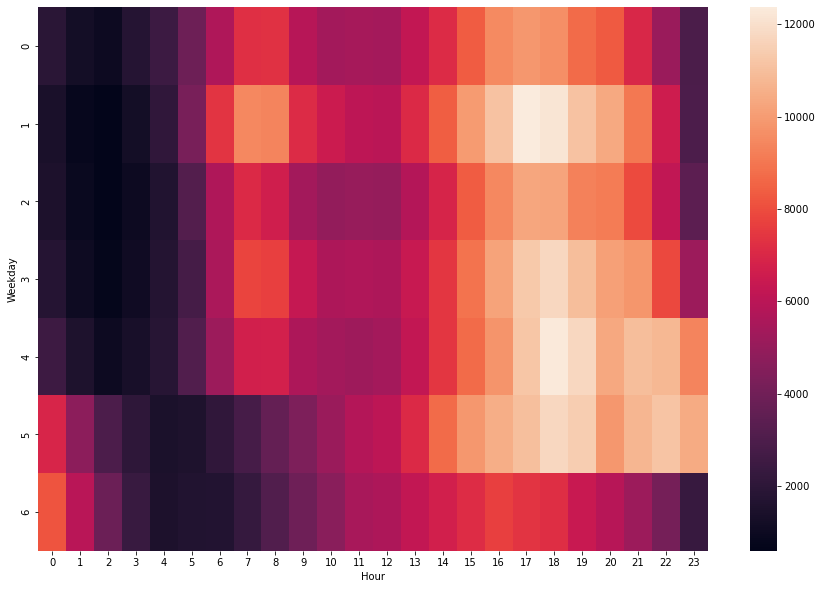

In [166]:
plt.figure(figsize=(15, 10))
seaborn.heatmap(Hour_Weekday);

# Analyzing by Latitude and longitude

# Latitude.

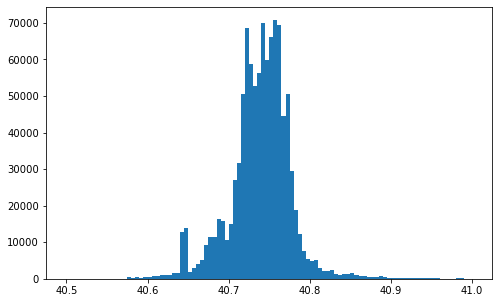

In [118]:
plt.figure(figsize=(8,5))
plt.hist(data['Lat'], bins=100, range = (40.5, 41));

# Longitude

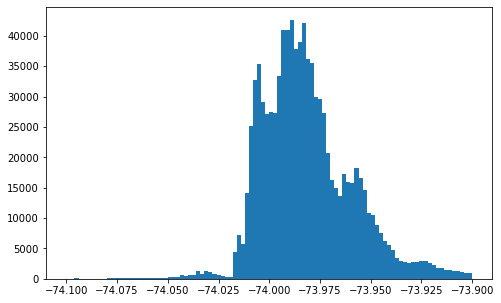

In [119]:
plt.figure(figsize=(8,5))
plt.hist(data['Lon'], bins=100, range = (-74.1,-73.9));

# Analyze both Latitude & Longitude

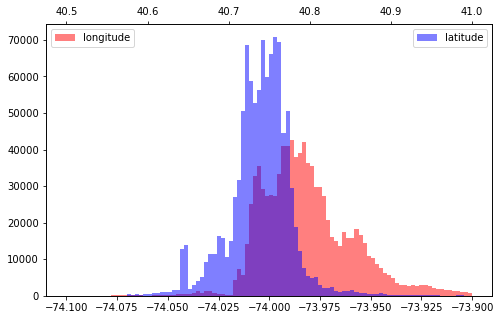

In [159]:
plt.figure(figsize=(8, 5))
plt.hist(data['Lon'], bins=100, range = (-74.1, -73.9), color='r', alpha=.5, label = 'longitude')
plt.legend(loc='upper left')
plt.twiny()
plt.hist(data['Lat'], bins=100, range = (40.5, 41), color='b', alpha=.5, label = 'latitude')
plt.legend(loc='best');

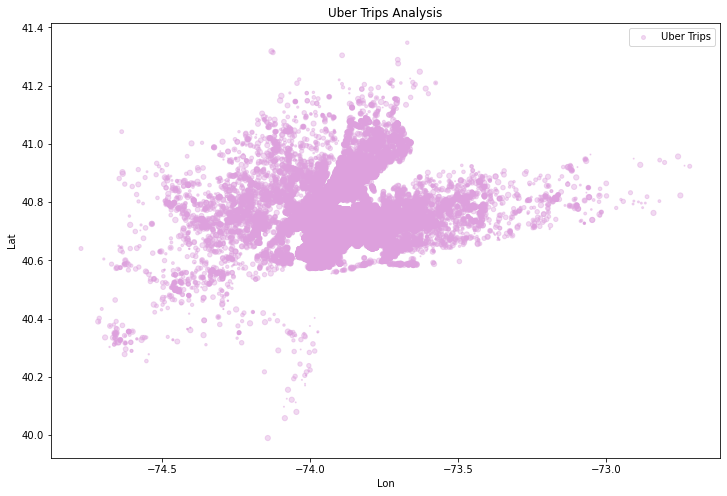

In [158]:
data.plot(kind='scatter', x='Lon', y='Lat', alpha=0.4,color='plum', s=data['Day'], label='Uber Trips',
figsize=(12, 8))
plt.title("Uber Trips Analysis")
plt.legend()
plt.show()

# My Summary.

## Tuesday is the most profitable day for uber.
## On Sunday less number of people use uber.
## 6 pm is the busiest day for uber.
## On average a rise in uber trips start around 5am.
## Most of the uber trips originate near the Manhattan region in New York.